In [83]:
import numpy as np
import matplotlib.pyplot as plt
import torch as torch
import torch.nn as nn
from sklearn import datasets
import pandas as pd
import seaborn as sns

In [10]:
df=pd.read_csv('linear_reg.csv')
df.shape

(30, 3)

In [11]:
df.dtypes

Unnamed: 0           int64
YearsExperience    float64
Salary             float64
dtype: object

<Axes: xlabel='YearsExperience', ylabel='Salary'>

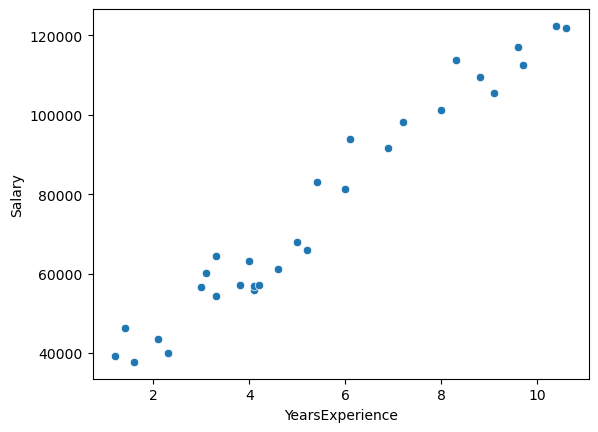

In [12]:
sns.scatterplot(x="YearsExperience",
                y="Salary",
                data=df)

In [22]:
x = df['YearsExperience']
y = df['Salary']
w = 0
y_hat = w*x

loss = ((y_hat-y)**2).mean()
print(loss)

6503107277.733334


In [23]:
dldw = (2*(w*x-y)*x).mean()
dldw

np.float64(-970008.8266666668)

In [24]:
w = w-0.01*dldw
w

np.float64(9700.088266666668)

In [29]:
y_hat = w*x

loss = ((y_hat-y)**2).mean()
print(loss)

583734924.028547


In [70]:
def forward (w,x):
    return w*x
def lossf (y_pred,y):
    return ((y_pred-y)**2).mean()
#why y_hat changed to y_pred? Is y_pred=w*x?
def gradient (x,y,w):
    gr=(2*(w*x-y)*x).mean()
    return gr

x = df['YearsExperience']
y = df['Salary']

w=0
ep=10
lr=0.01
ws=np.array([w])

for epoch in range (ep):
    y_hat=forward(w,x)
    loss=lossf(y_hat,y)
    gr=gradient (x,y,w)
    w-=gr*lr

    print(f' epoch {epoch+1}: w= {w:.3f}, loss = {loss:.3f}') #what is f' epoch
    ws=np.append(ws,w) 

 epoch 1: w= 9700.088, loss = 6503107277.733
 epoch 2: w= 12204.780, loss = 583734924.029
 epoch 3: w= 12851.525, loss = 189065948.771
 epoch 4: w= 13018.523, loss = 162751739.979
 epoch 5: w= 13061.645, loss = 160997263.119
 epoch 6: w= 13072.779, loss = 160880284.909
 epoch 7: w= 13075.654, loss = 160872485.489
 epoch 8: w= 13076.397, loss = 160871965.470
 epoch 9: w= 13076.588, loss = 160871930.798
 epoch 10: w= 13076.638, loss = 160871928.486


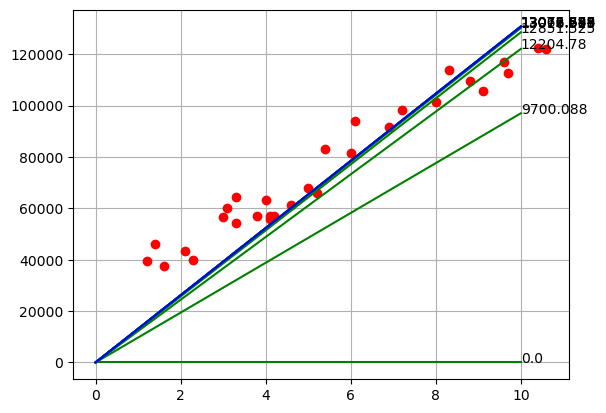

In [72]:
fig=plt.figure()
xv=np.linspace(0,10, 1000)
plt.grid()

plt.plot(x,y,'ro')  
for i in range(len(ws)-1):
    plt.plot(xv, ws[i]*xv, 'g')   
    plt.annotate(np.round(ws[i],3), xy=(10,ws[i]*10))
plt.plot(xv, ws[-1]*xv, 'b') 
plt.show()

In [73]:
def forward (w,x,b):
    return w*x+b
def lossf (y_pred,y):
    return ((y_pred-y)**2).mean()
def gradient (x,b,y,w):
    gr_w=(2*(w*x+b-y)*x).mean()
    gr_b=(2*(w*x+b-y)).mean()
    return gr_w, gr_b

x = df['YearsExperience']
y = df['Salary']

w=0
b=0
ep=10
lr=0.01
param=np.array([w,b])

for epoch in range (ep):
    y_hat=forward(w,x,b)
    loss=lossf(y_hat,y)
    gr_w, gr_b=gradient (x,b,y,w)
    w-=gr_w*lr
    b-=gr_b*lr

    print(f' epoch {epoch+1}: w= {w:.3f}, b= {b:.3f}, loss = {loss:.3f}') #what is f' epoch
    param=np.vstack((param,[w,b])) 

 epoch 1: w= 9700.088, b= 1520.080, loss = 6503107277.733
 epoch 2: w= 12040.206, b= 1959.562, loss = 514619474.061
 epoch 3: w= 12596.875, b= 2136.898, loss = 162124312.173
 epoch 4: w= 12721.414, b= 2250.418, loss = 140585000.604
 epoch 5: w= 12741.282, b= 2348.185, loss = 138486512.217
 epoch 6: w= 12735.827, b= 2441.845, loss = 137536439.579
 epoch 7: w= 12724.278, b= 2534.223, loss = 136660585.356
 epoch 8: w= 12711.295, b= 2626.003, loss = 135795816.393
 epoch 9: w= 12698.005, b= 2717.353, loss = 134938370.289
 epoch 10: w= 12684.684, b= 2808.316, loss = 134087971.382


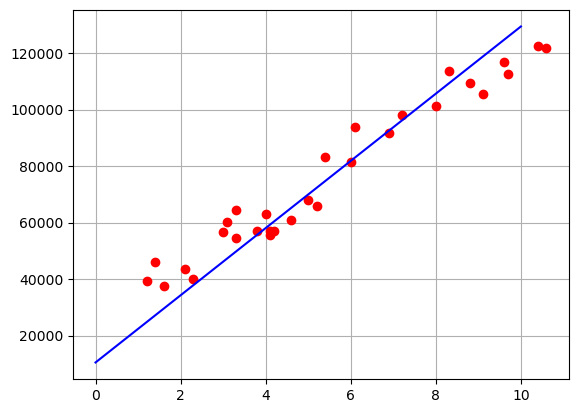

In [88]:
fig=plt.figure()
xv=np.linspace(0,10,1000)
plt.grid()

plt.plot(x,y,'ro')          

plt.plot(xv, param[-1][0]*xv+param[-1][1], 'b')
plt.show()

In [77]:
#Why is showing just half of the line?

In [79]:
def forward(w,b,x):
    return w*x+b
def lossfunc(y_pred, y):
    return ((y_pred-y)**2).mean()
def gradient(w, b, y, x):
    gr_w=(2*(w*x+b-y)*x).mean()
    gr_b=(2*(w*x+b-y)).mean()
    return gr_w, gr_b

def shuffle_data(X,y):
    N = X.shape[0]
    shuffled_idx = np.random.permutation(N)
    return X[shuffled_idx], y[shuffled_idx]
    
x = df['YearsExperience']
y = df['Salary']
x,y = shuffle_data(x, y)
N=x.shape[0]
batch_size=3
n_batches=N//batch_size

w=0.0
b=0.0
n_epoch=10
lr=0.01
param=np.array([w,b])

for epoch in range(n_epoch):
    running_loss = 0.0
    bn=1
    for b_idx in range(0, N, batch_size):
        x_batch=x[b_idx:b_idx+batch_size]
        y_batch=y[b_idx:b_idx+batch_size]
    
        y_hat=forward(w,b,x_batch)
        loss=lossfunc(y_hat,y_batch)
        running_loss+=(loss*x_batch.shape[0])
        gr_w, gr_b=gradient(w, b, y_batch,x_batch)
    
        w-=gr_w*lr
        b-=gr_b*lr
    
        print(f' epoch {epoch+1}, batch {bn}: loss = {loss:.3f} ')
        bn+=1
        avg_loss = running_loss/ N
        print(f' epoch {epoch+1}: w= {w:.3f}, b= {b:.3f}, loss = {avg_loss:.3f}')
        param=np.vstack((param,[w,b]))

 epoch 1, batch 1: loss = 2630162665.667 
 epoch 1: w= 3133.631, b= 1009.713, loss = 263016266.567
 epoch 1, batch 2: loss = 5257936315.352 
 epoch 1: w= 15045.890, b= 2382.768, loss = 788809898.102
 epoch 1, batch 3: loss = 274608273.097 
 epoch 1: w= 12805.135, b= 2122.589, loss = 816270725.412
 epoch 1, batch 4: loss = 170873308.281 
 epoch 1: w= 12487.741, b= 2173.767, loss = 833358056.240
 epoch 1, batch 5: loss = 87760612.002 
 epoch 1: w= 13069.807, b= 2318.468, loss = 842134117.440
 epoch 1, batch 6: loss = 370106937.629 
 epoch 1: w= 13476.382, b= 2630.614, loss = 879144811.203
 epoch 1, batch 7: loss = 261747576.370 
 epoch 1: w= 10779.412, b= 2363.763, loss = 905319568.840
 epoch 1, batch 8: loss = 128104969.888 
 epoch 1: w= 11695.872, b= 2586.603, loss = 918130065.828
 epoch 1, batch 9: loss = 90033184.510 
 epoch 1: w= 12544.912, b= 2752.768, loss = 927133384.280
 epoch 1, batch 10: loss = 174645096.215 
 epoch 1: w= 13299.949, b= 2973.113, loss = 944597893.901
 epoch 2, 

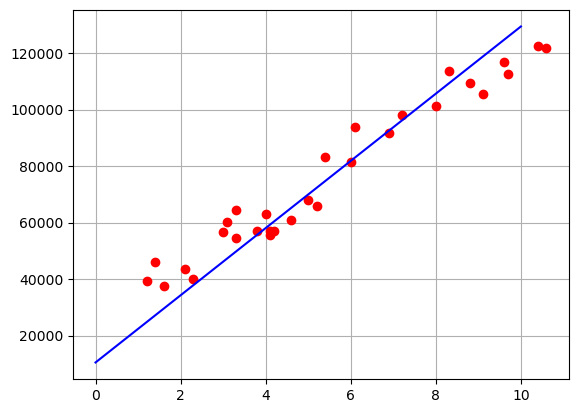

In [87]:
	fig=plt.figure()
xv=np.linspace(0,10, 1000)
plt.grid()

plt.plot(x,y,'ro')         

plt.plot(xv, param[-1][0]*xv+param[-1][1], 'b')      
plt.show()

In [86]:
xt=torch.tensor(df['YearsExperience'],dtype=torch.float32)
yt=torch.tensor(df['Salary'],dtype=torch.float32)
w=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)
b=torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

lr=0.01
ep=10

def forward(w,b,x):
    return w*x+b
    
lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD([w, b], lr=lr)  

for epoch in range(ep):
    y_pred=forward(w, b, xt)
    loss=lossfunc(yt, y_pred)
    optimizer.zero_grad()
    loss.backward()   
    optimizer.step()

    
    print(f' epoch {epoch+1}: w= {w:.3f}, b= {b:.3f}, loss = {loss:.3f}')  

 epoch 1: w= 9700.089, b= 1520.080, loss = 6503107072.000
 epoch 2: w= 12040.207, b= 1959.562, loss = 514619392.000
 epoch 3: w= 12596.875, b= 2136.898, loss = 162124272.000
 epoch 4: w= 12721.414, b= 2250.418, loss = 140584992.000
 epoch 5: w= 12741.281, b= 2348.185, loss = 138486544.000
 epoch 6: w= 12735.827, b= 2441.845, loss = 137536464.000
 epoch 7: w= 12724.278, b= 2534.223, loss = 136660576.000
 epoch 8: w= 12711.295, b= 2626.003, loss = 135795808.000
 epoch 9: w= 12698.006, b= 2717.353, loss = 134938368.000
 epoch 10: w= 12684.684, b= 2808.315, loss = 134087992.000


In [89]:
xt=torch.tensor(df['YearsExperience'],dtype=torch.float32).reshape(-1,1)
yt=torch.tensor(df['Salary'],dtype=torch.float32).reshape(-1,1)

n_sample, n_features = xt.shape

model=nn.Linear(n_features, 1)

with torch.inference_mode(): 
    model.weight[0,0] = 0
    model.bias[0] = 0

lr=0.01
ep=10

lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=lr)  

for epoch in range(ep):
    y_pred=model(xt)
    loss=lossfunc(yt, y_pred)
    loss.backward()   
    optimizer.step()
    optimizer.zero_grad()
    
    [w,b]=model.parameters()
    print(f' epoch {epoch+1}: w= {w[0][0]:.3f}, b= {b[0]:.3f}, loss = {loss:.3f}')   

 epoch 1: w= 9700.089, b= 1520.080, loss = 6503107072.000
 epoch 2: w= 12040.207, b= 1959.562, loss = 514619392.000
 epoch 3: w= 12596.875, b= 2136.898, loss = 162124272.000
 epoch 4: w= 12721.414, b= 2250.418, loss = 140584992.000
 epoch 5: w= 12741.281, b= 2348.185, loss = 138486544.000
 epoch 6: w= 12735.826, b= 2441.845, loss = 137536464.000
 epoch 7: w= 12724.278, b= 2534.223, loss = 136660608.000
 epoch 8: w= 12711.295, b= 2626.003, loss = 135795808.000
 epoch 9: w= 12698.006, b= 2717.353, loss = 134938368.000
 epoch 10: w= 12684.684, b= 2808.315, loss = 134087992.000


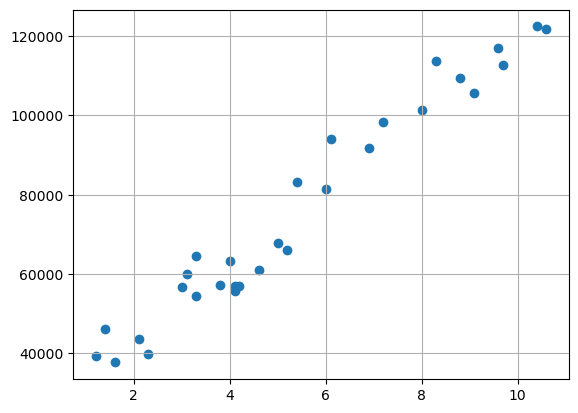

In [106]:
x=torch.tensor(df['YearsExperience'],dtype=torch.float32).reshape(-1,1)
y=torch.tensor(df['Salary'],dtype=torch.float32).reshape(-1,1)

y=y.view(y.shape[0], 1)          
n_samples, n_features = x.shape

fig=plt.figure()
xv=np.linspace(0,5, 1000)
plt.grid()

plt.scatter(x,y) 
plt.show()

In [114]:
model=nn.Linear(n_features, 1)

lr=0.02
ep=10

lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=lr)  

for epoch in range(ep):
    y_pred=model(x)
    loss=lossfunc(y, y_pred)
    loss.backward()   
    optimizer.step()
    optimizer.zero_grad()
    
    [w,b]=model.parameters()
    print(f' epoch {epoch+1}: w= {w[0][0]:.3f}, b= {b[0]:.3f}, loss = {loss:.3f}')   

 epoch 1: w= 19399.857, b= 3039.661, loss = 6502372352.000
 epoch 2: w= 9360.735, b= 1757.519, loss = 1829435008.000
 epoch 3: w= 14493.014, b= 2700.467, loss = 587052288.000
 epoch 4: w= 11807.000, b= 2494.387, loss = 255808912.000
 epoch 5: w= 13150.508, b= 2878.163, loss = 166574624.000
 epoch 6: w= 12417.723, b= 2955.673, loss = 141636064.000
 epoch 7: w= 12755.296, b= 3188.755, loss = 133794072.000
 epoch 8: w= 12541.584, b= 3339.418, loss = 130512672.000
 epoch 9: w= 12612.305, b= 3530.331, loss = 128462152.000
 epoch 10: w= 12536.769, b= 3698.293, loss = 126757800.000


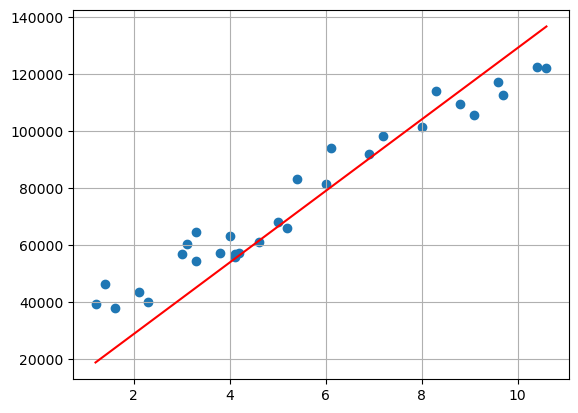

In [115]:
with torch.inference_mode(): 
    y_pred_line=model(x)
    fig=plt.figure()
    plt.scatter(x,y) 
    plt.plot(x, y_pred_line, 'r')
    plt.grid()
    plt.show()

In [123]:
from torch.utils.data import DataLoader,TensorDataset

dataset = TensorDataset(x,y)
train_loader = DataLoader(dataset, batch_size=10, shuffle=True)

In [126]:
model=nn.Linear(n_features, 1)

lr=0.02
n_epoch=100

lossfunc=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(), lr=lr)  

#training
for epoch in range(n_epoch):
    for i,(inputs, labels) in enumerate(train_loader):
        y_pred=model(x)
        loss=lossfunc(y, y_pred)
        loss.backward()   
        optimizer.step()
        optimizer.zero_grad()
        
        [w,b]=model.parameters()
    print(f' epoch {epoch+1}: w= {w[0][0]:.3f}, b= {b[0]:.3f}, loss = {loss:.3f}')   

 epoch 1: w= 14493.205, b= 2700.179, loss = 587130176.000
 epoch 2: w= 12417.748, b= 2955.369, loss = 141640272.000
 epoch 3: w= 12612.351, b= 3530.037, loss = 128464824.000
 epoch 4: w= 12498.435, b= 4046.068, loss = 123621736.000
 epoch 5: w= 12428.881, b= 4555.580, loss = 119156808.000
 epoch 6: w= 12355.338, b= 5051.795, loss = 114910296.000
 epoch 7: w= 12284.371, b= 5535.988, loss = 110869040.000
 epoch 8: w= 12215.035, b= 6008.324, loss = 107023056.000
 epoch 9: w= 12147.410, b= 6469.108, loss = 103362888.000
 epoch 10: w= 12081.435, b= 6918.623, loss = 99879576.000
 epoch 11: w= 12017.075, b= 7357.144, loss = 96564560.000
 epoch 12: w= 11954.289, b= 7784.939, loss = 93409720.000
 epoch 13: w= 11893.038, b= 8202.271, loss = 90407312.000
 epoch 14: w= 11833.285, b= 8609.396, loss = 87549992.000
 epoch 15: w= 11774.993, b= 9006.564, loss = 84830720.000
 epoch 16: w= 11718.129, b= 9394.019, loss = 82242832.000
 epoch 17: w= 11662.653, b= 9771.997, loss = 79779984.000
 epoch 18: w= 

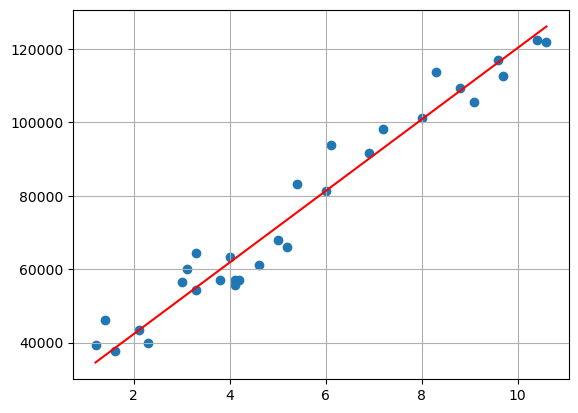

In [127]:
with torch.inference_mode(): 
    y_pred_line=model(x)
    fig=plt.figure()
    plt.scatter(x,y) 
    plt.plot(x,y_pred_line,'r')
    plt.grid()
    plt.show()